## About the Data
The 550 urine specimens, were analyzed in an effort to
determine if certain physical characteristics of the urine might be related to the
formation of calcium oxalate crystals.

   ### The six physical characteristics of the urine are: 
    1. specific gravity, the density of the urine relative to water;
    2. pH, the negative logarithm of the hydrogen ion; 
    3. osmolarity (mOsm), a unit used in biology and medicine but not in physical chemistry.
         Osmolarity is proportional to the concentration of molecules in solution; 
    4.conductivity (mMho milliMho). One Mho is one reciprocal Ohm. 
         Conductivity is proportional to the concentration of charged ions in solution; 
    5. urea concentration in millimoles per litre; and 
    6. calcium concentration (CALC) in millimolesllitre.

The data is obtained from **'Physical Characteristics of Urines With and Without Crystals'**, a chapter from Springer Series in Statistics.

https://link.springer.com/chapter/10.1007/978-1-4612-5098-2_45




In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##  Reading Dataset

In [54]:
train_df = pd.read_csv("P:/../Kidney Stone Prediction/train.csv")
test_df = pd.read_csv("P:/../Kidney Stone Prediction/test.csv")

In [55]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [56]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       276 non-null    int64  
 1   gravity  276 non-null    float64
 2   ph       276 non-null    float64
 3   osmo     276 non-null    int64  
 4   cond     276 non-null    float64
 5   urea     276 non-null    int64  
 6   calc     276 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 15.2 KB


# EXPLOTARY DATA ANALYSIS(EDA)

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

EDA can be leveraged to check for outliers, patterns, and trends in the given data.<br>
EDA helps to find meaningful patterns in data.<br>
EDA provides in-depth insights into the data sets to solve our business problems.<br>
EDA gives a clue to impute missing values in the dataset. <br>

In [57]:
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [58]:
train_df.tail()

,id,gravity,ph,osmo,cond,urea,calc,target
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1
413,413,1.011,6.13,364,9.9,159,0.27,0


In [59]:
#count null values
train_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [60]:
#shape
train_df.shape

(414, 8)

In [61]:
#info
#describe
train_df.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


### Deleting id columns

In [62]:
train_df.drop('id', axis = 1, inplace = True)
test_df = test_df.drop('id', axis = 1)

## Univariate Analysis

Analyzing/visualizing the dataset by taking one variable at a time:

Data visualization is essential; we must decide what charts to plot to better understand the data.Here, we visualize our data using Matplotlib and Seaborn libraries.

Matplotlib is a Python 2D plotting library used to draw basic charts we use Matplotlib.

Seaborn is also a python library built on top of Matplotlib that uses short lines of code to create and style statistical plots from Pandas and Numpy

Univariate analysis can be done for both Categorical and Numerical variables.

Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

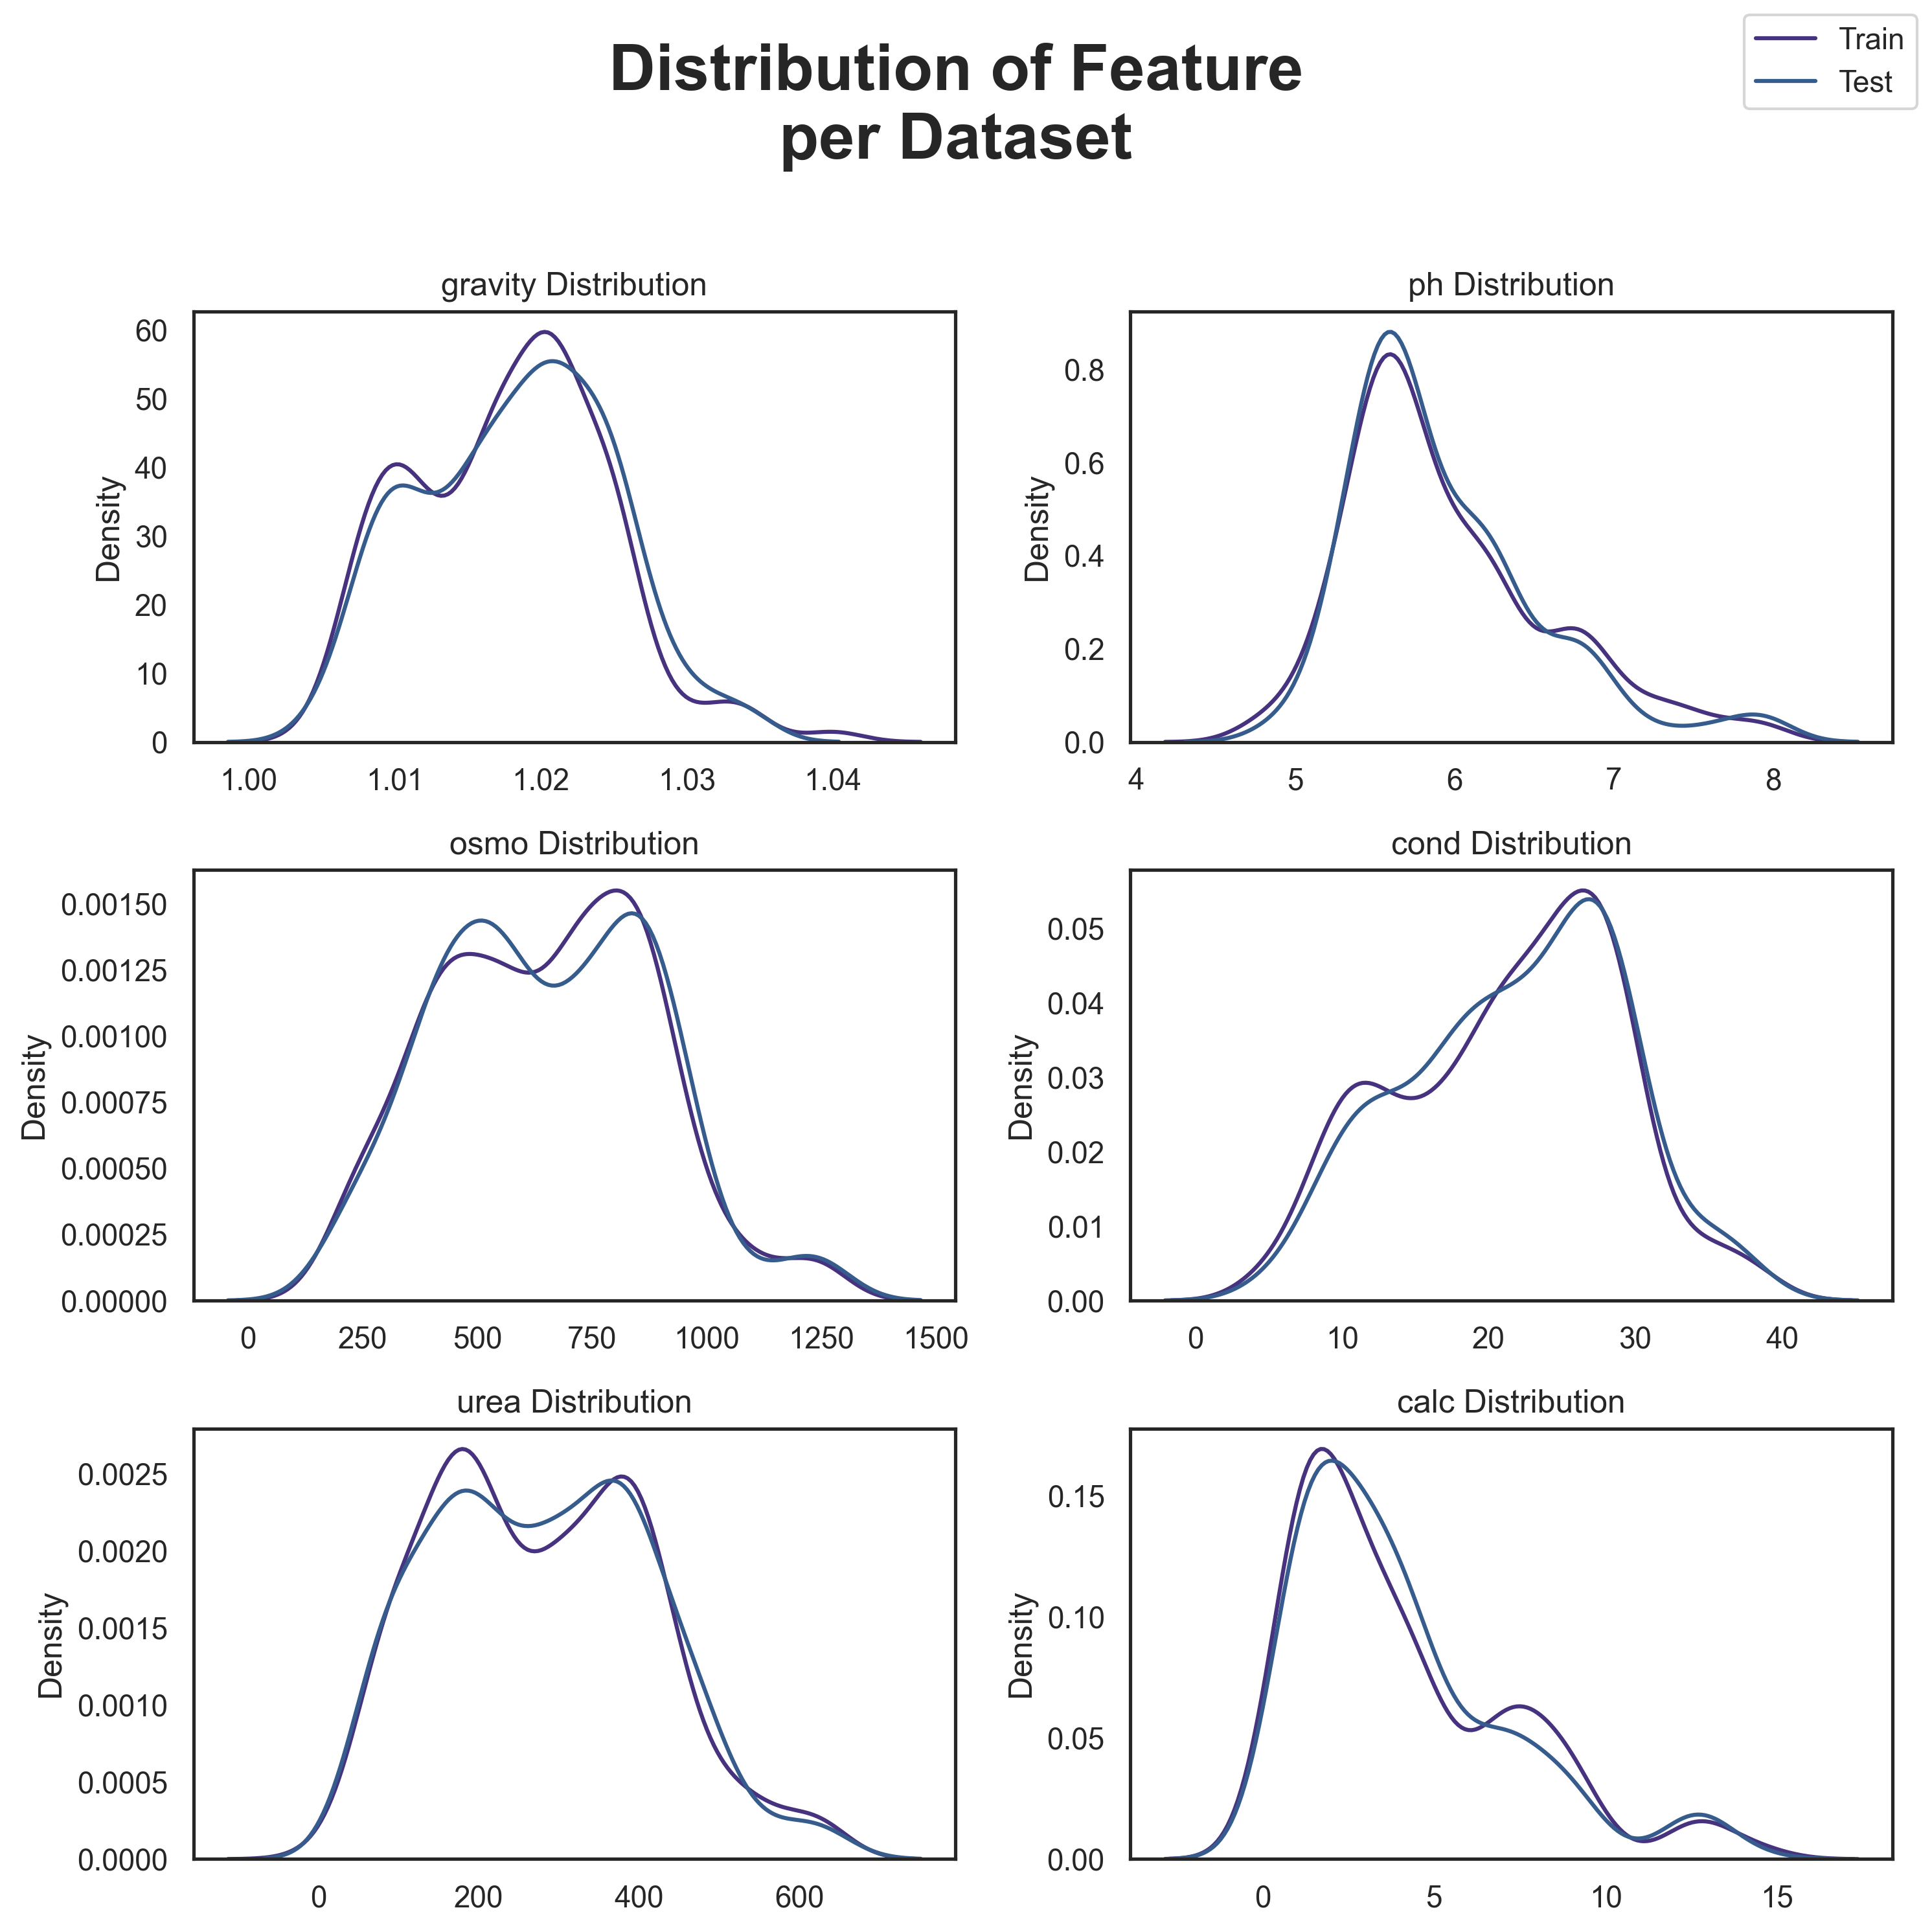

In [63]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10), dpi = 300)
ax = ax.flatten()

sns.set_theme(style = 'white', palette = 'viridis')
pal = sns.color_palette('viridis')

for i, column in enumerate(test_df.columns):
    sns.kdeplot(train_df[column], ax=ax[i], color=pal[0])    
    sns.kdeplot(test_df[column], ax=ax[i], color=pal[1])
    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    
fig.suptitle('Distribution of Feature\nper Dataset\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Train', 'Test'])
plt.tight_layout()

#### Key Points
1. Train and test datasets have similar distribution so we can trust the CV.

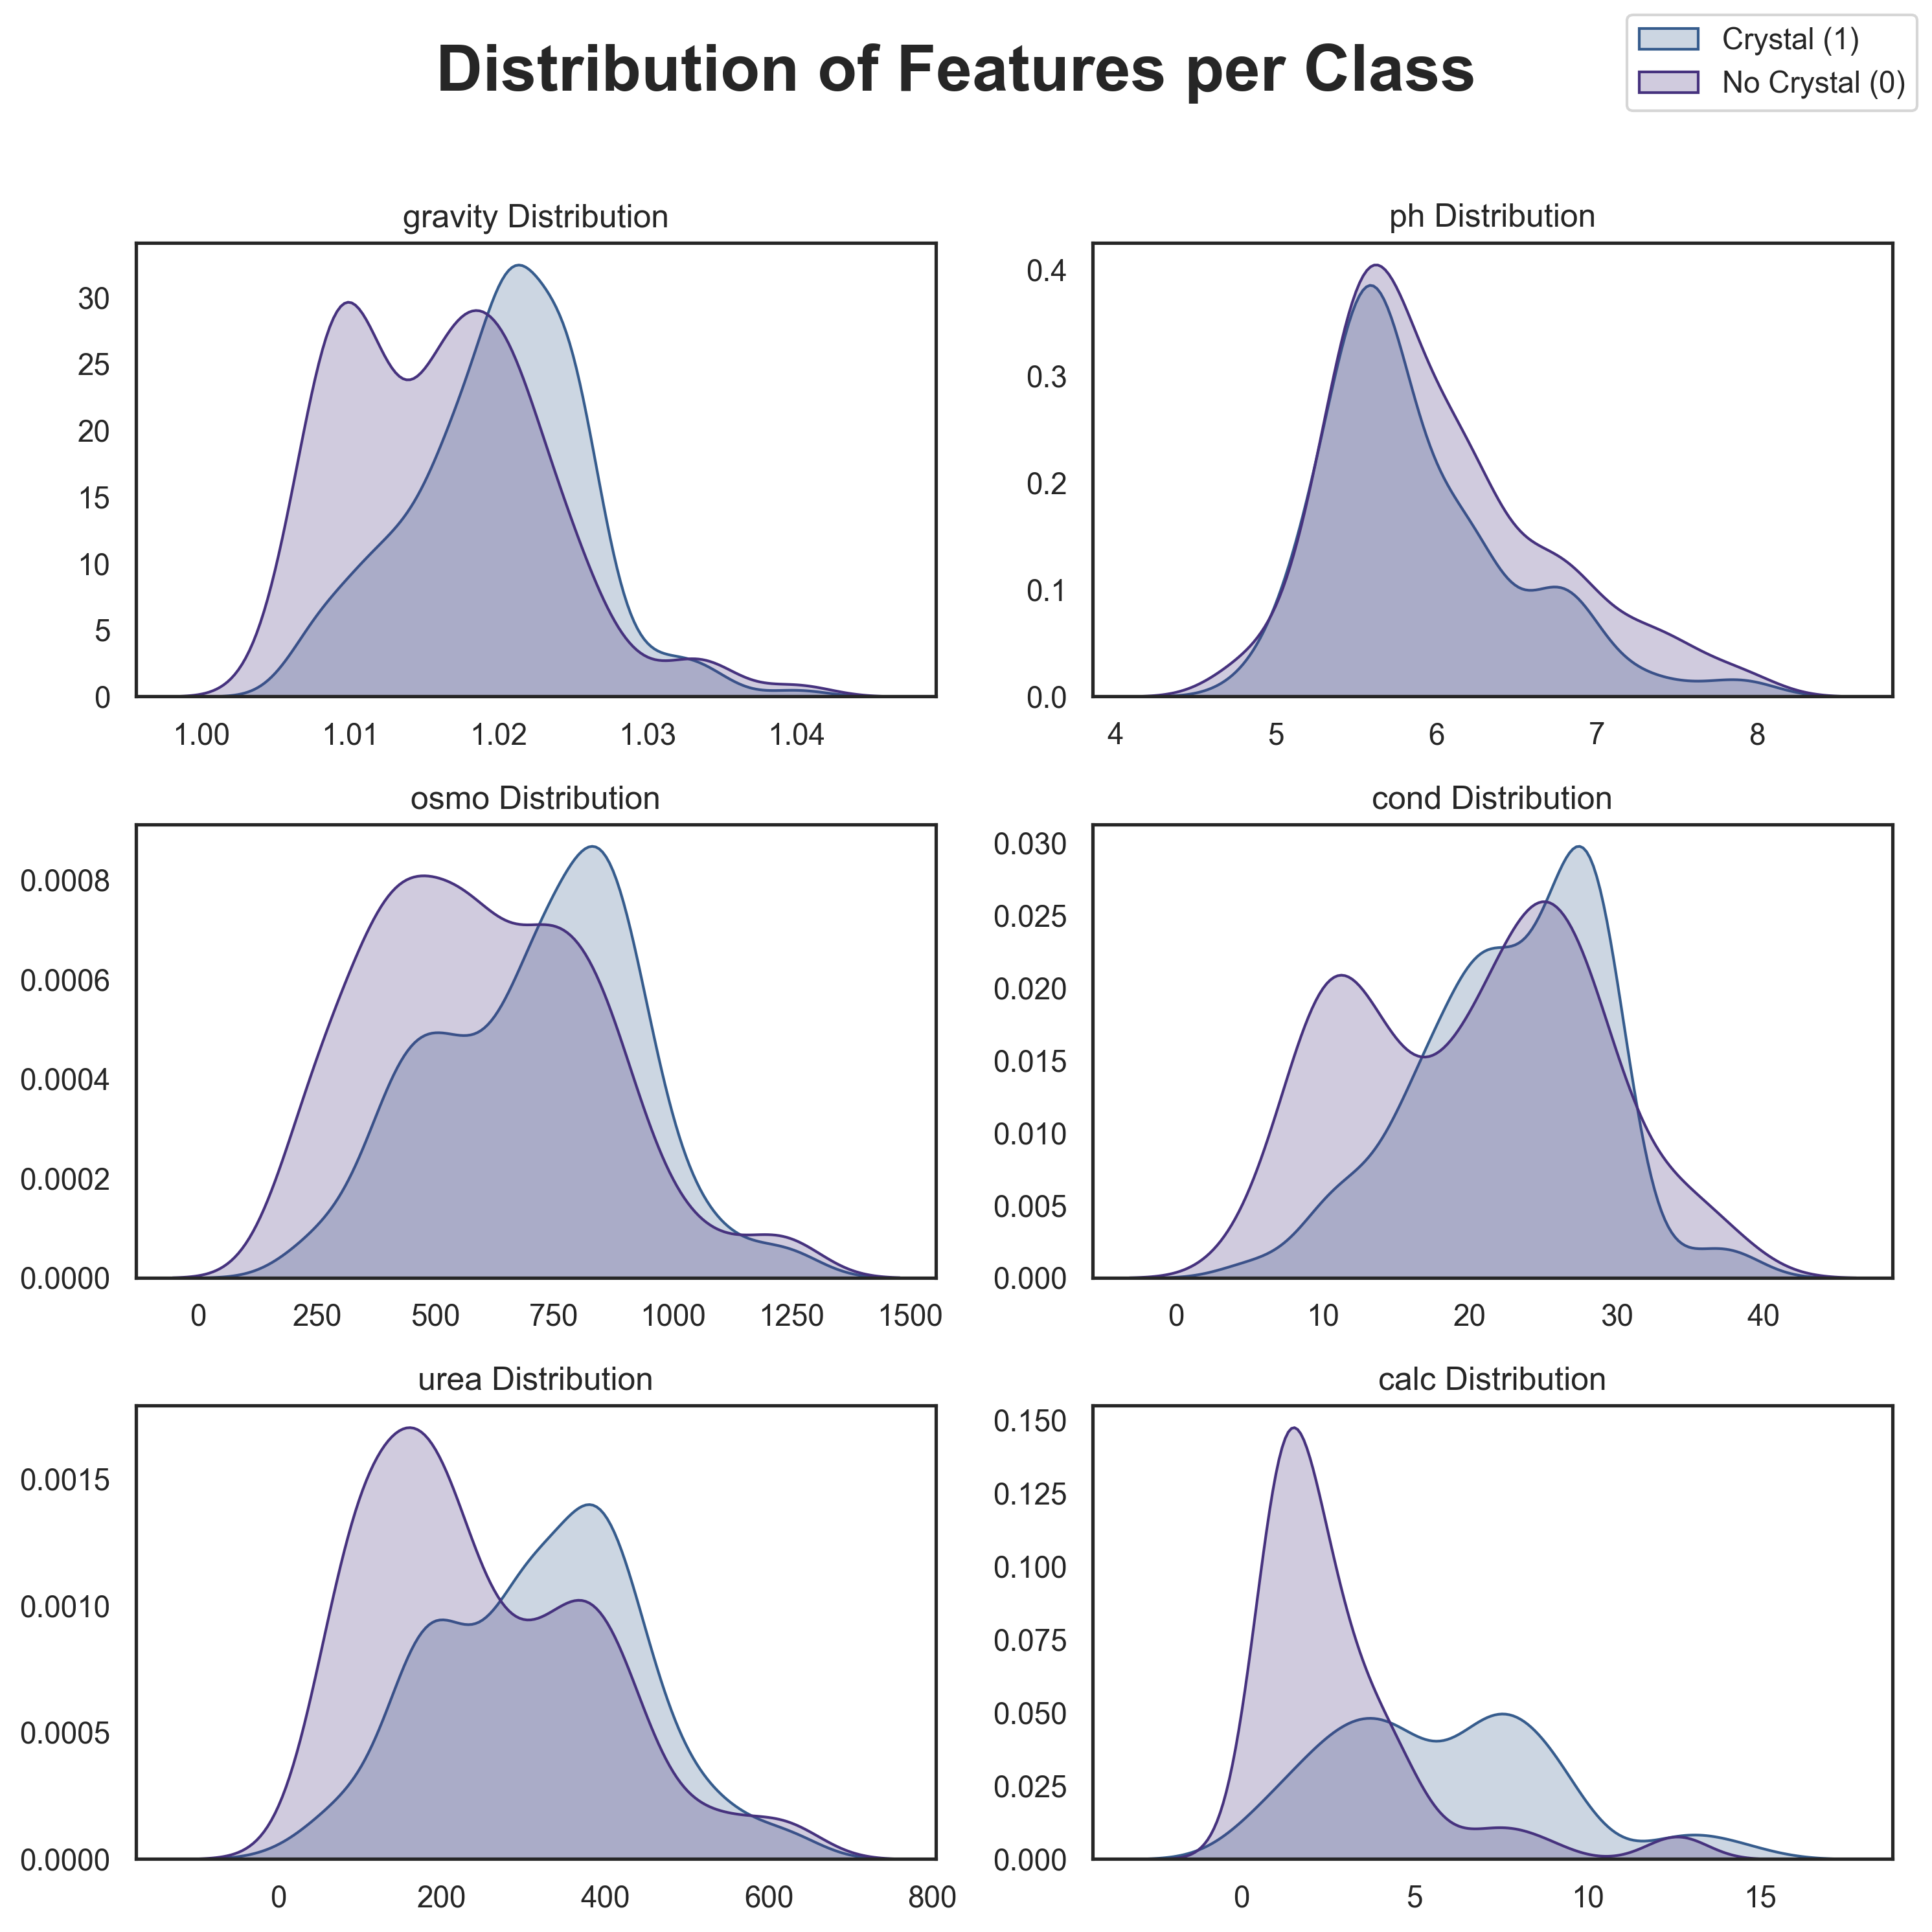

In [64]:
fig, ax = plt.subplots(3, 2, figsize = (10, 10), dpi = 300)
ax = ax.flatten()

for i, column in enumerate(test_df.columns):
    sns.kdeplot(data = train_df, x = column, ax=ax[i], color=pal[0], fill = True, legend = False, hue = 'target')
    
    ax[i].set_title(f'{column} Distribution')
    ax[i].set_xlabel(None)
    ax[i].set_ylabel(None)
    
fig.suptitle('Distribution of Features per Class\n', fontsize = 24, fontweight = 'bold')
fig.legend(['Crystal (1)', 'No Crystal (0)'])
plt.tight_layout()

**Key points:** It looks like gravity, urea, and calc have positive impact on target. We can confirm this causal relationship later.

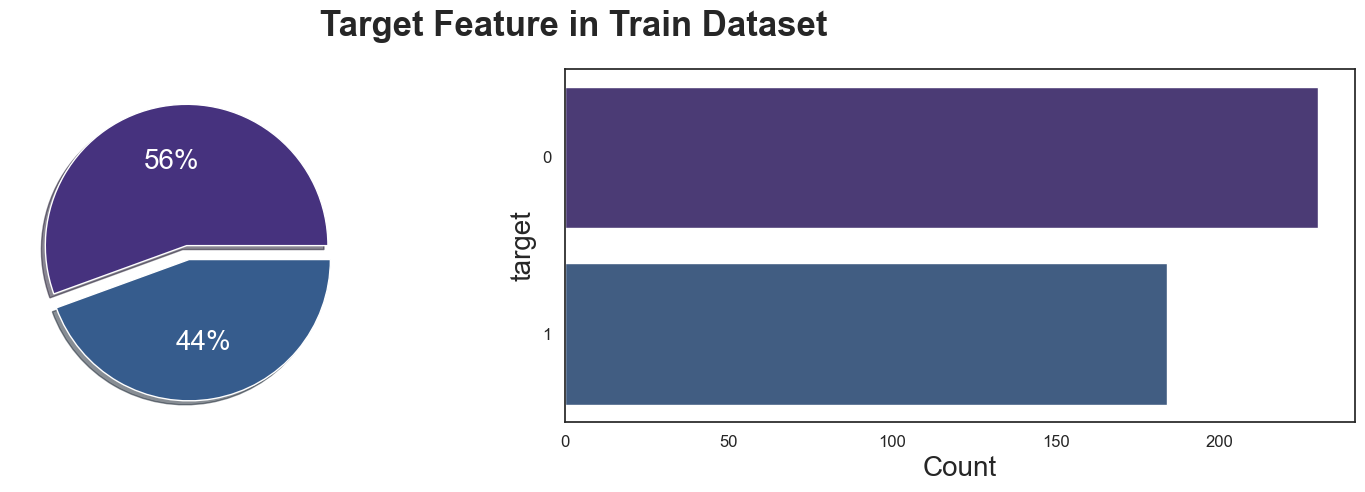

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
ax = ax.flatten()

ax[0].pie(
    train_df['target'].value_counts(), 
    shadow = True, 
    explode = [0, 0.1], 
    autopct = '%1.f%%',
    textprops = {'size' : 20, 'color' : 'white'}
)

sns.countplot(data = train_df, y = 'target', ax = ax[1])
ax[1].yaxis.label.set_size(20)
plt.yticks(fontsize = 12)
ax[1].set_xlabel('Count', fontsize = 20)
plt.xticks(fontsize = 12)

fig.suptitle('Target Feature in Train Dataset', fontsize = 25, fontweight = 'bold')
plt.tight_layout()


**Key points:** target has relatively balanced distribution

# #EDA Bivariate Analysis
Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

For Numerical variables, **Pair plots and Scatter plots** are widely been used to do Bivariate Analysis.

A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

<Figure size 1300x1700 with 0 Axes>

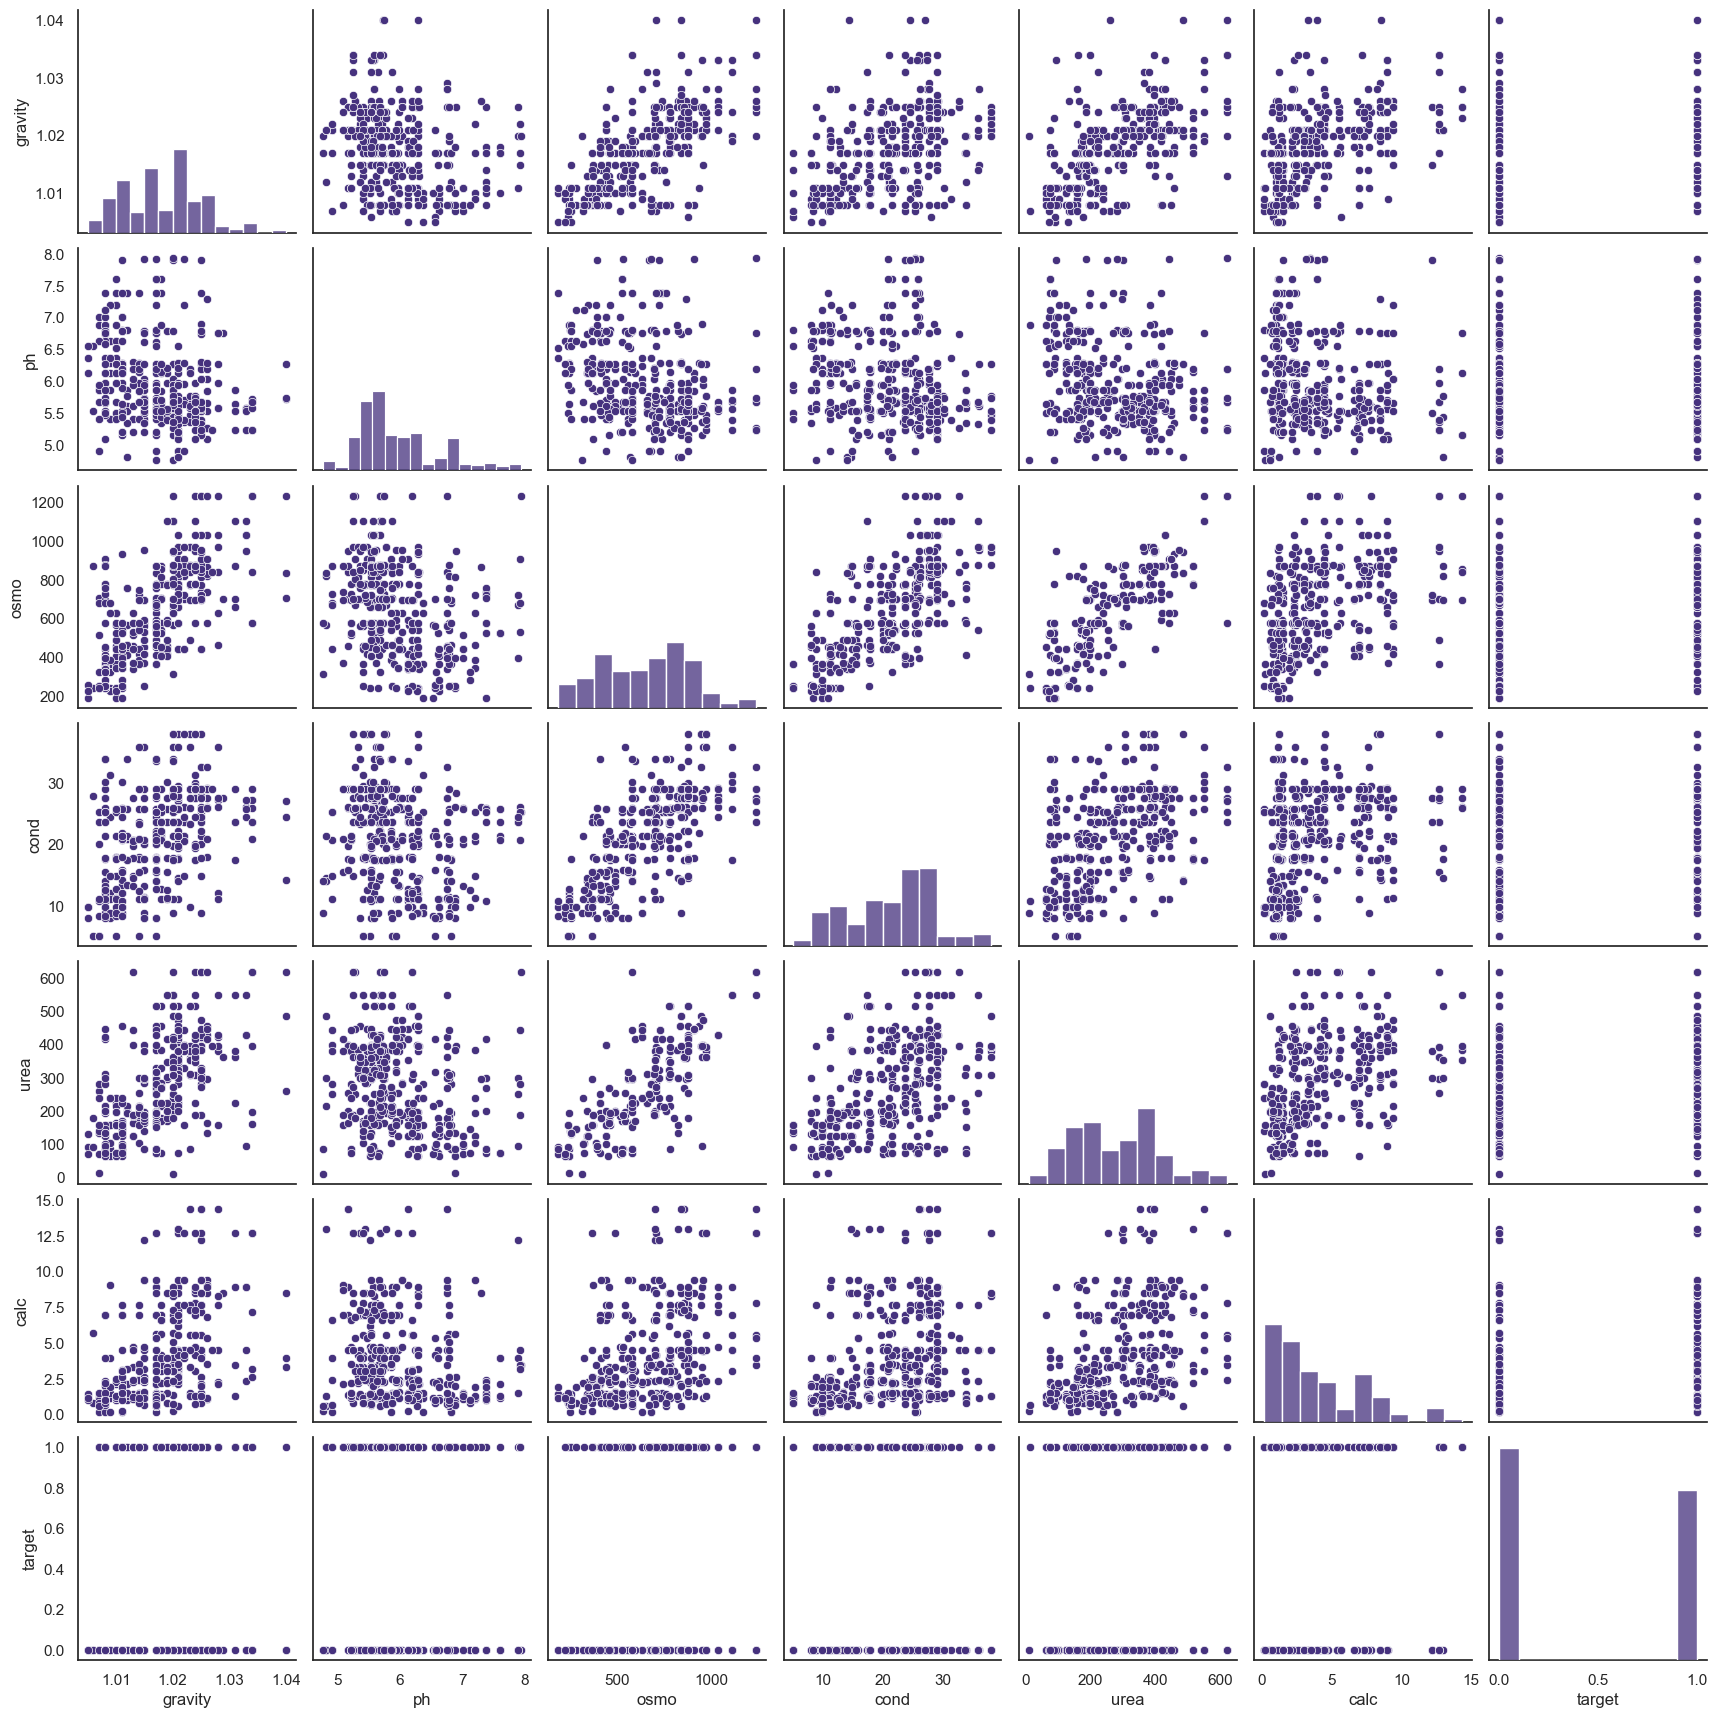

In [66]:
#pair plot

plt.figure(figsize=(13,17))
sns.pairplot(train_df)
plt.show()

# multivariate analysis

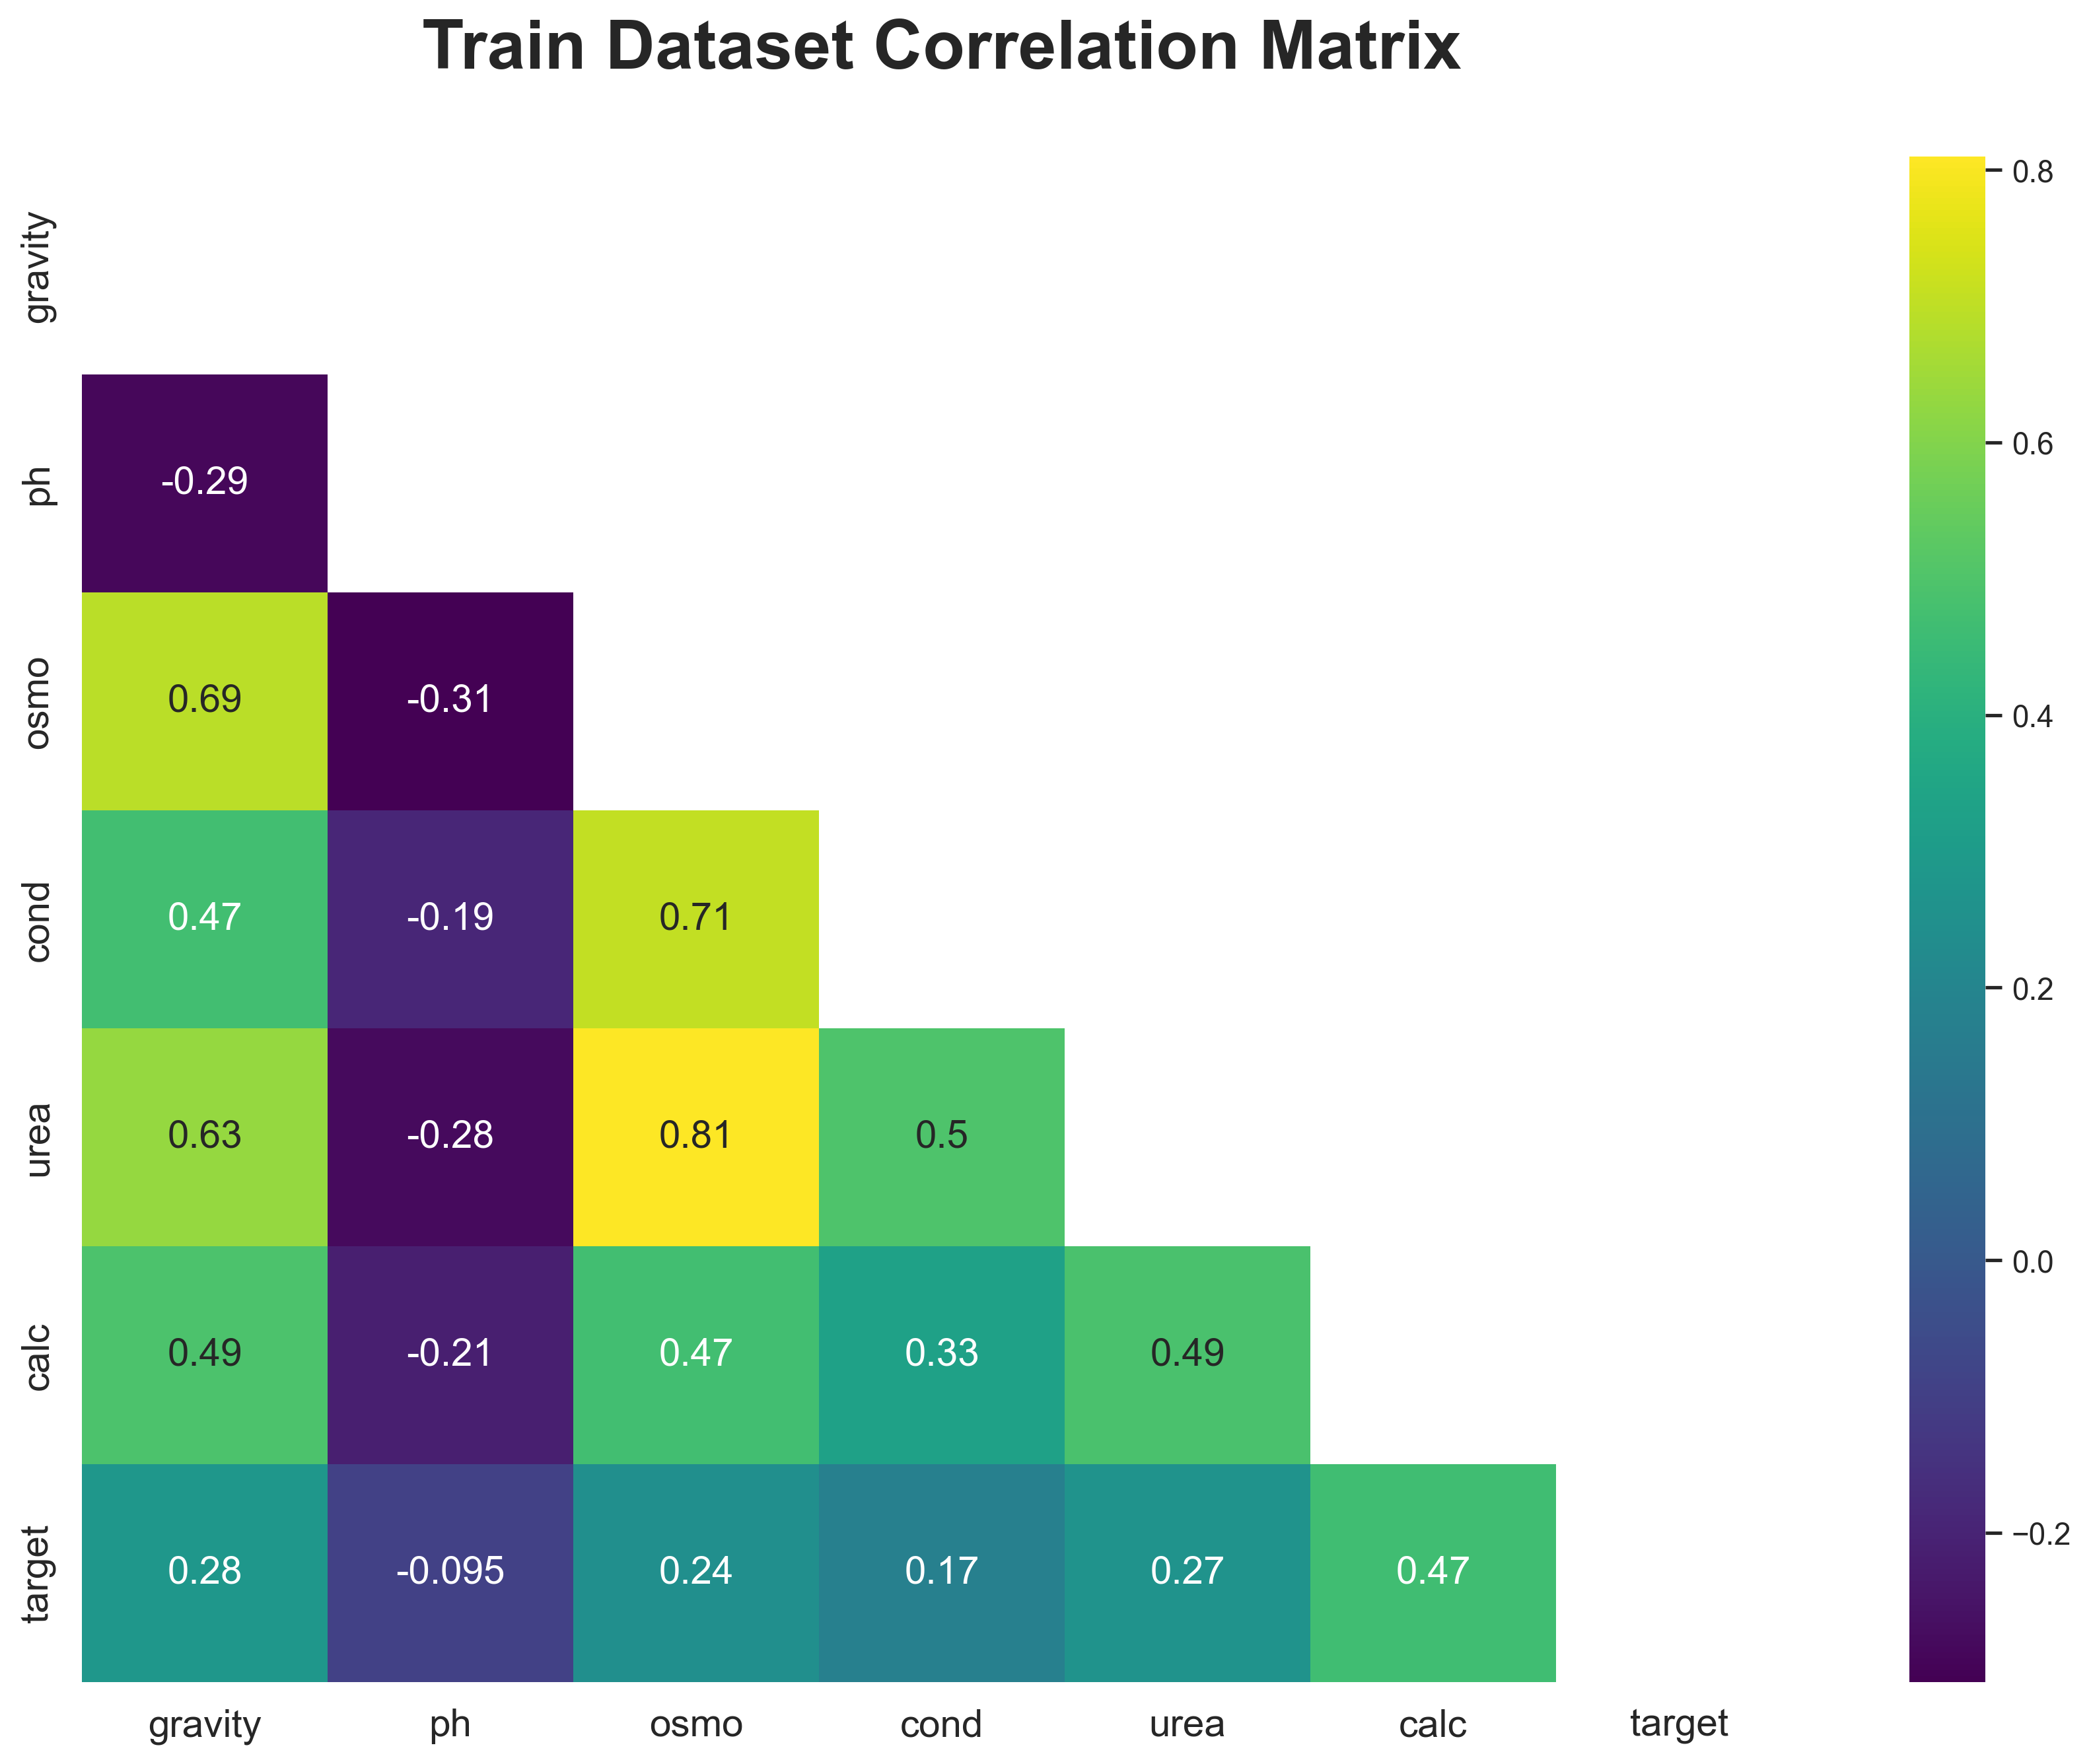

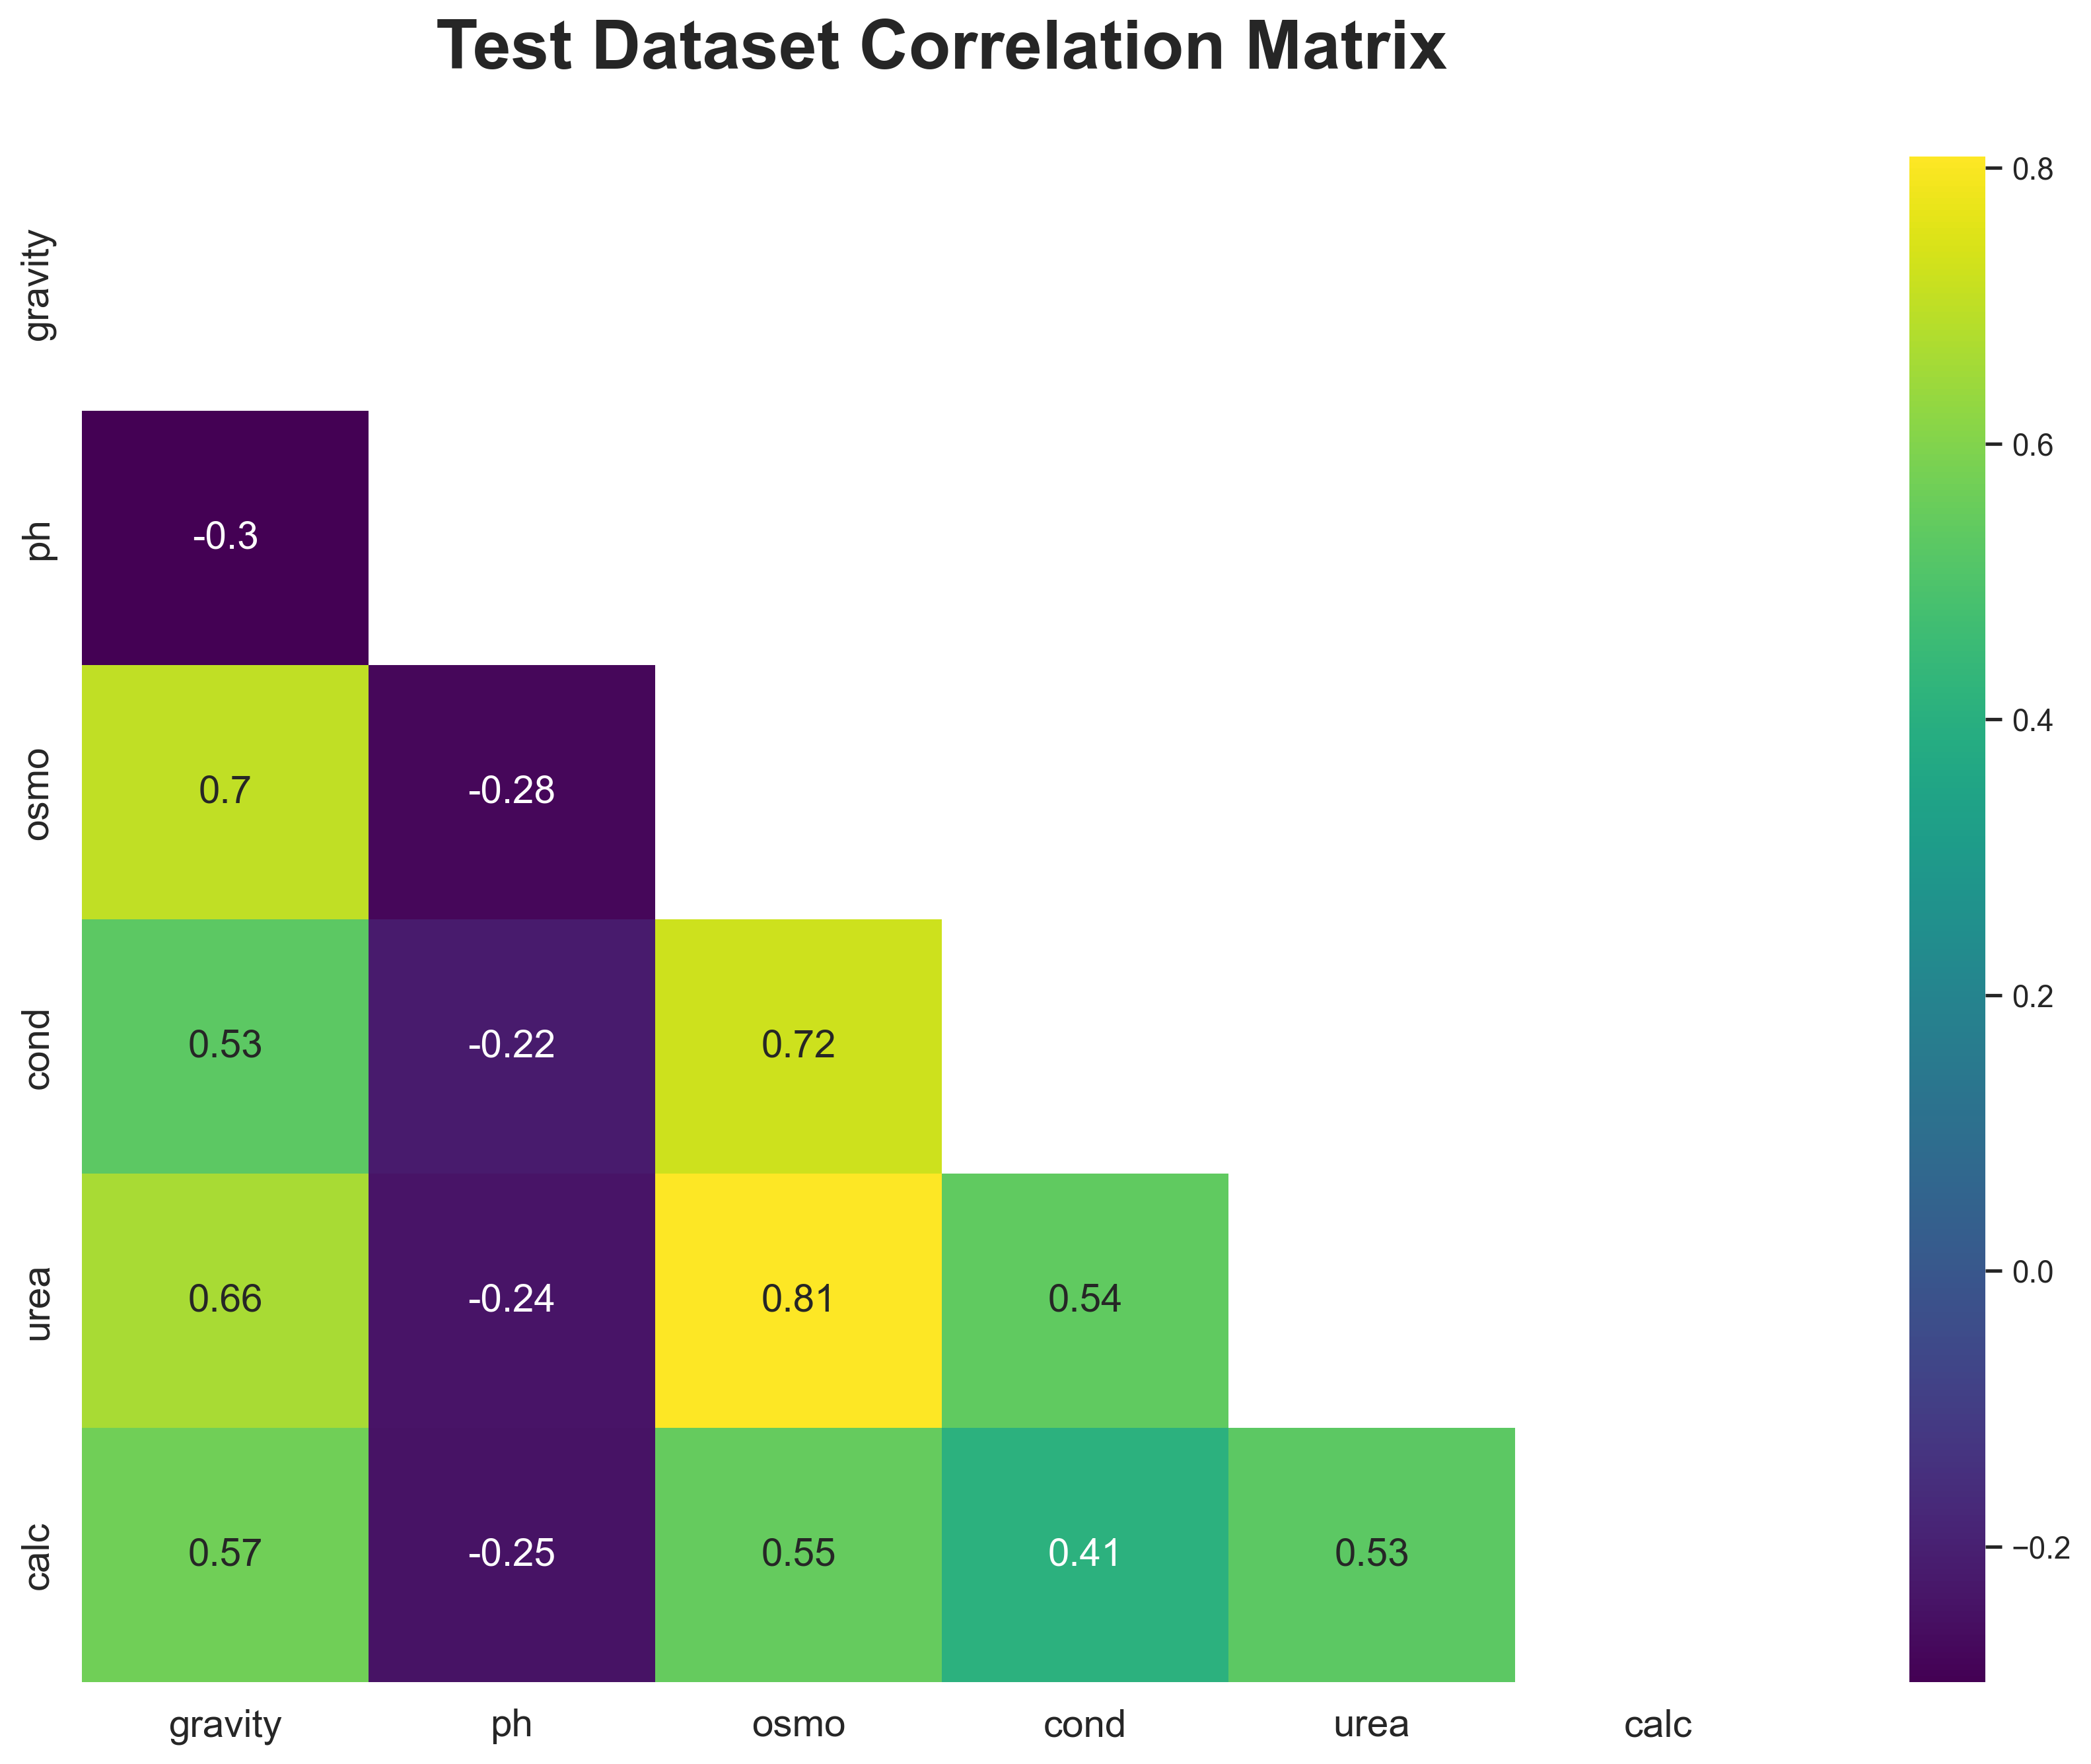

In [67]:
#correlation & heatmap

def heatmap(dataset, label = None):
    corr = dataset.corr()
    plt.figure(figsize = (14, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, annot = True, annot_kws = {'size' : 14}, cmap = 'viridis')
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()
    
heatmap(train_df, 'Train')
heatmap(test_df, 'Test')

**Key points:**

All features except ph are correlated with each others.
target is moderately correlated with calc and gravity


In [68]:
#histogram & box plot

In [69]:
#count plot

# Model Building & Training

Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under binary classification problem, as the prediction of kidney stone is a binary number in programming terms. The supervised machine learning models (classification) considered to train the dataset in this notebook are:

Logistic Regression
k-Nearest Neighbors
Support Vector Clasifier
Naive Bayes
Decision Tree
Random Forest
Gradient Boosting
Catboost
Xgboost
Multilayer Perceptrons

#### The metrics considered to evaluate the model performance are Accuracy & F1 score.


In [70]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib 

In [71]:
# Creating holders to store the model performance results
from sklearn import metrics 
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))
    


def model_report(modelname,y_train,y_test,p_train,p_test):
    #computing the accuracy, f1_score, Recall, precision of the model performance
    #computing the classification report of the model
    #storing the results. The below mentioned order of parameter passing is important
    print("Model:{}\n".format(modelname))
    
    acc_train = metrics.accuracy_score(y_train,p_train)
    acc_test = metrics.accuracy_score(y_test,p_test)
    print("Accuracy on training Data: {:.3f}".format(acc_train))
    print("Accuracy on test Data: {:.3f}\n".format(acc_test))
    
    f1_score_train = metrics.f1_score(y_train,p_train,average='micro')
    f1_score_test = metrics.f1_score(y_test,p_test,average='micro')
    print("f1_score on training Data: {:.3f}".format(f1_score_train))
    print("f1_score on test Data: {:.3f}\n".format(f1_score_test))
    

    recall_score_train = metrics.recall_score(y_train,p_train,average='micro')
    recall_score_test = metrics.recall_score(y_test,p_test,average='micro')
    print("Recall on training Data: {:.3f}".format(recall_score_train))
    print("Recall on test Data: {:.3f}\n".format(recall_score_test))

    precision_score_train = metrics.precision_score(y_train,p_train,average='micro')
    precision_score_test = metrics.precision_score(y_test,p_test,average='micro')
    print("Precision on training Data: {:.3f}".format(precision_score_train))
    print("Precision on test Data: {:.3f}\n".format(precision_score_test))
   
    #computing the classification report of the model
    print("Classification Report")
    print(metrics.classification_report(y_test, p_test))
    
    #storing the results
    storeResults(modelname,acc_test,f1_score_test,
             recall_score_test,precision_score_test)

In [76]:
X = train_df['ph']
Y = train_df['target']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((331,), (331,), (83,), (83,))

### 1. Logistic Regression
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [78]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[5.77 5.71 6.9  5.98 5.24 5.71 5.71 5.74 6.63 5.24 4.91 6.13 5.44 5.58
 5.68 5.68 6.19 5.53 5.86 5.68 5.33 5.53 5.53 5.56 5.27 5.53 6.03 5.71
 5.85 6.29 6.61 6.27 5.24 5.62 6.88 6.27 5.97 6.56 6.03 6.63 5.68 5.71
 5.53 4.81 5.66 5.4  7.2  5.66 5.68 5.47 6.13 5.66 5.97 5.21 6.29 5.24
 5.85 5.66 7.61 6.52 6.79 5.74 5.58 7.2  5.44 7.9  6.19 5.24 5.51 7.38
 5.58 5.47 5.51 5.56 6.79 6.79 6.76 5.56 5.09 6.29 6.13 5.87 5.36 6.81
 6.21 5.53 6.14 6.19 5.41 4.81 7.9  5.47 5.62 5.97 5.16 5.56 5.87 5.94
 5.09 5.98 6.13 6.81 6.03 5.66 5.64 7.92 6.79 6.79 4.76 5.87 6.63 5.51
 7.3  6.88 5.87 5.51 5.58 5.53 5.53 5.87 5.21 5.53 5.68 6.19 5.53 5.77
 7.12 5.44 5.71 6.79 5.53 6.29 5.87 5.64 6.88 6.27 5.36 5.58 6.75 6.37
 7.2  5.36 5.56 5.77 6.3  5.67 5.41 6.27 5.87 5.77 5.16 5.21 5.58 7.94
 6.19 7.9  6.14 5.74 5.41 5.33 5.41 7.38 5.85 6.13 6.28 5.27 6.76 5.87
 5.77 5.53 5.51 5.36 6.37 6.03 5.4  5.98 5.67 6.27 4.76 5.53 5.51 5.53
 5.87 6.14 5.86 5.53 5.35 5.16 6.79 6.29 4.91 5.56 5.24 6.19 5.68 5.77
 5.16 5.68 5.21 5.44 5.58 6.37 6.13 5.71 6.37 5.53 5.86 5.09 5.53 5.33
 7.92 5.58 5.21 5.27 5.74 6.76 5.97 5.6  6.28 6.29 5.66 7.61 5.21 6.28
 5.36 5.44 5.68 6.76 6.56 5.53 5.98 5.98 6.52 5.98 6.76 6.79 7.38 5.96
 6.88 7.01 5.85 5.41 6.76 6.19 5.71 5.86 6.88 5.66 5.61 5.53 5.94 7.61
 5.73 5.74 6.58 5.44 5.53 7.61 5.68 5.53 5.24 5.9  5.4  7.01 7.38 5.6
 5.4  5.98 7.2  5.85 7.01 5.33 5.58 5.53 5.61 5.27 6.81 5.62 6.56 5.73
 5.51 4.81 4.9  5.6  5.68 6.3  6.27 5.44 5.86 6.28 6.63 6.28 6.29 6.79
 5.66 6.28 5.62 5.16 7.92 5.68 6.21 5.53 5.73 5.35 4.9  5.87 5.77 5.64
 5.63 5.44 5.62 6.19 5.62 6.81 5.41 5.33 6.79 5.68 5.62 7.01 5.94 5.68
 5.53 6.13 7.01 5.94 6.28 6.13 5.35 5.68 6.76].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [79]:
#predicting the target value from the model for the samples

p_train_log = log.predict(X_train)
p_test_log = log.predict(X_test)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
model_report(str(log),y_train,y_test,p_train_log,p_test_log)

# 2. K-Nearest Neighbors : Classifier
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [ ]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

In [ ]:
#predicting the target value from the model for the samples
p_train_knn = knn.predict(X_train)
p_test_knn = knn.predict(X_test)

In [ ]:
model_report(str(knn),y_train,y_test,p_train_knn,p_test_knn)

In [ ]:
knn_training_accuracy = []
knn_test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn1 = KNeighborsClassifier(n_neighbors=n)

    knn1.fit(X_train, y_train)
    # record training set accuracy
    knn_training_accuracy.append(knn1.score(X_train, y_train))
    # record generalization accuracy
    knn_test_accuracy.append(knn1.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, knn_training_accuracy, label="training accuracy")
plt.plot(depth, knn_test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

# 3. Support Vector Machine : Classifier
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)

In [ ]:
#predicting the target value from the model for the samples
p_train_svc = svc.predict(X_train)
p_test_svc = svc.predict(X_test)

In [ ]:
model_report(str(svc),y_train,y_test,p_train_svc,p_test_svc)

# Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.


In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'F1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })
sorted_result=result.sort_values(by=['Accuracy', 'F1_score'],ascending=False).reset_index(drop=True)
sorted_result